### Dynamic Factor Model

In [1]:
import pandas as pd
import numpy as np

In [21]:
sample = pd.read_excel('../Data/생산활동.xlsx', index_col = 0)
sample.index = pd.to_datetime(sample.index)
sample

,mine
index,
2001-01-01,-4.2
2001-02-01,5.5
2001-03-01,1.5
2001-04-01,4.5
2001-05-01,1.7
...,...
2023-05-01,-7.6
2023-06-01,-6.0
2023-07-01,-8.1


In [23]:
gdp = pd.read_excel('../Data/GDP 성장률.xlsx', index_col = 0)
gdp

,전기대비(좌축),gdp_rate
index,,
2000-Q1,1.9,12.7
2000-Q2,1.3,9.1
2000-Q3,2.8,9.1
2000-Q4,-0.3,5.9
2001-Q1,1.2,5.1
...,...,...
2022-Q3,0.2,3.2
2022-Q4,-0.3,1.4
2023-Q1,0.3,0.9


In [28]:
gdp.index = pd.date_range(start = '2000-01-01', end = '2023-11-01', freq = 'Q').strftime('%Y-%m')
gdp.index = pd.to_datetime(gdp.index)

In [29]:
gdp

,전기대비(좌축),gdp_rate
2000-03-01,1.9,12.7
2000-06-01,1.3,9.1
2000-09-01,2.8,9.1
2000-12-01,-0.3,5.9
2001-03-01,1.2,5.1
...,...,...
2022-09-01,0.2,3.2
2022-12-01,-0.3,1.4
2023-03-01,0.3,0.9
2023-06-01,0.6,0.9


In [30]:
matrix = pd.concat([sample, gdp], axis = 1).iloc[4:]

In [31]:
matrix

,mine,전기대비(좌축),gdp_rate
2001-01-01,-4.2,NaN,NaN
2001-02-01,5.5,NaN,NaN
2001-03-01,1.5,1.2,5.1
2001-04-01,4.5,NaN,NaN
2001-05-01,1.7,NaN,NaN
...,...,...,...
2023-05-01,-7.6,NaN,NaN
2023-06-01,-6.0,0.6,0.9
2023-07-01,-8.1,NaN,NaN
2023-08-01,-0.7,NaN,NaN


### Proportional Denton Method

In [32]:
from statsmodels.tsa.interp.denton import dentonm
import matplotlib.pyplot as plt

In [53]:
benchmarked = dentonm(matrix['mine'].cumsum(), matrix['전기대비(좌축)'].dropna().cumsum(), freq = "qm")

<Axes: >

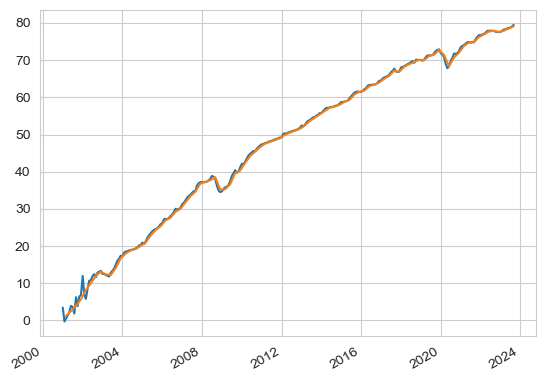

In [54]:
plt.plot(pd.Series(benchmarked * 3, index = matrix.index))
matrix['전기대비(좌축)'].dropna().cumsum().plot()

In [55]:
pd.Series(benchmarked * 3, index = matrix.index).diff()

2001-01-01         NaN
2001-02-01   -3.742178
2001-03-01    0.774719
2001-04-01    0.855242
2001-05-01    0.931466
                ...   
2023-05-01    0.162155
2023-06-01    0.224425
2023-07-01    0.014940
2023-08-01    0.356977
2023-09-01    0.430223
Length: 273, dtype: float64

In [56]:
gdp_new = pd.Series(benchmarked * 3, index = matrix.index, name = 'gdp_estimated').diff().fillna(0)

In [57]:
matrix['전기대비(좌축)'].dropna()

2001-03-01    1.2
2001-06-01    1.3
2001-09-01    1.4
2001-12-01    1.8
2002-03-01    2.5
             ... 
2022-09-01    0.2
2022-12-01   -0.3
2023-03-01    0.3
2023-06-01    0.6
2023-09-01    0.6
Name: 전기대비(좌축), Length: 91, dtype: float64

Text(0.5, 1.0, 'Proportional Denton Methods')

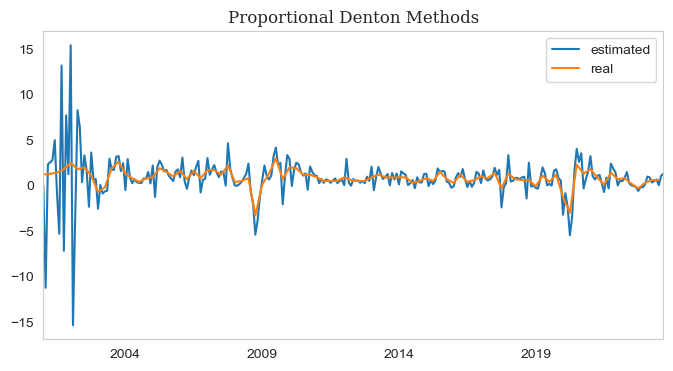

In [58]:
plt.figure(figsize = (8,4))
(gdp_new*3).plot(label = 'estimated')
matrix['전기대비(좌축)'].dropna().plot(label = 'real')
plt.legend()
plt.grid(False)
plt.title('Proportional Denton Methods', fontsize = 12, fontfamily = 'Serif')

In [61]:
# gdp_new.to_excel('../Cleaned_Data/gdp_target.xlsx')

### Machine Learning Test

In [26]:
test.head()

,retail,restaurant,finance,real_estate,delivery,telecom,health,service,saving,unemployment,bank,debt,mine,building,kospi,interest,cpi,export,import,gdp
2001-01-31,0.043741,0.036723,0.098540,0.176245,0.035659,0.180952,-0.189944,0.024793,0.248170,0.216843,-0.105263,0.314540,-0.042,0.062,-0.423656,0.0845,0.034,0.040,-0.013,NaN
2001-02-28,0.026856,0.085128,0.003425,0.008083,0.035354,0.196217,-0.059561,0.067797,0.193031,0.206761,-0.035088,0.167061,0.055,0.097,-0.359725,0.0834,0.036,0.053,0.059,NaN
2001-03-31,0.047482,0.099117,-0.107595,-0.065004,0.045524,0.202198,-0.139319,0.070568,0.185069,0.176823,0.000000,0.201193,0.015,0.028,-0.498023,0.0826,0.040,-0.021,-0.089,1.2
2001-04-30,0.046784,0.097561,0.051282,-0.061146,0.036641,0.197701,-0.083832,0.093156,0.187747,0.155242,-0.088889,0.253957,0.045,0.058,-0.228243,0.0810,0.048,-0.104,-0.160,NaN
2001-05-31,0.058824,0.086124,0.051903,-0.047041,0.044843,0.200000,-0.150442,0.044374,0.178672,0.145010,-0.097561,0.249448,0.017,0.023,-0.178623,0.0799,0.053,-0.091,-0.130,NaN


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = test.iloc[:,:-1]
y = gdp_new

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False)

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'squared_error',
                              max_depth = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.019647354932183596


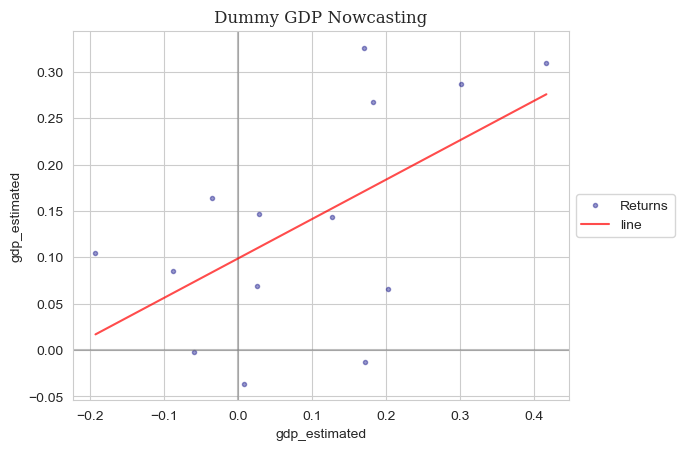

In [28]:
import seaborn as sns
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Dummy GDP Nowcasting', fontfamily = 'Serif')
plt.show()

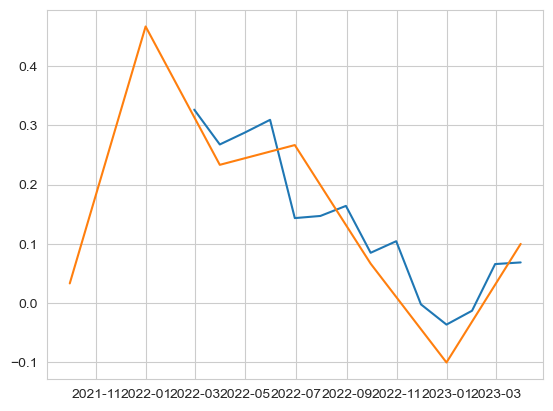

In [29]:
plt.plot(pd.Series(y_pred, index = X_test.index))
plt.plot(test['gdp'][-20:].dropna() / 3)

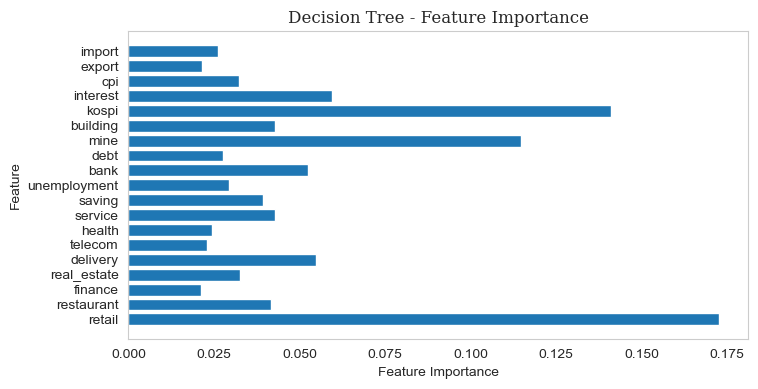

In [30]:
importance = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize = (8, 4))
plt.barh(range(len(importance)), importance, align="center")
plt.yticks(np.arange(len(importance)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.grid(False)
plt.title("Decision Tree - Feature Importance", fontsize = 12, fontfamily = 'Serif')
plt.show()

In [31]:
import shap

X = test.iloc[:,:-1]
y = gdp_new

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, shuffle = False)

explainer_randomforest_reg = shap.TreeExplainer(model)

shap_values_train = explainer_randomforest_reg(X_train)
shap_values_test = explainer_randomforest_reg(X_test)
shap_values_all = explainer_randomforest_reg(X)

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


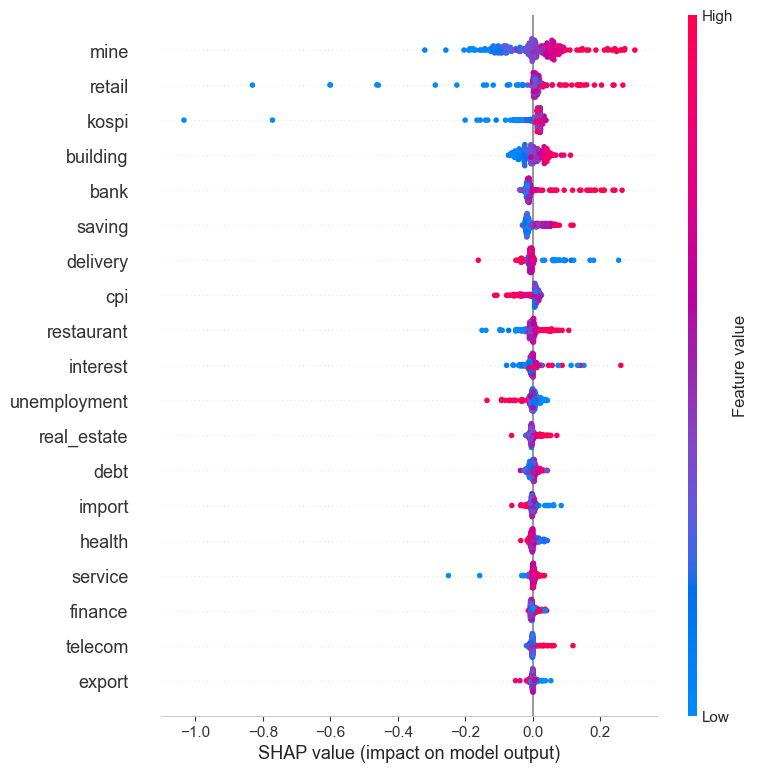

In [34]:
plt.grid(False)
shap.plots.beeswarm(shap_values_train, max_display = len(shap_values_train.feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


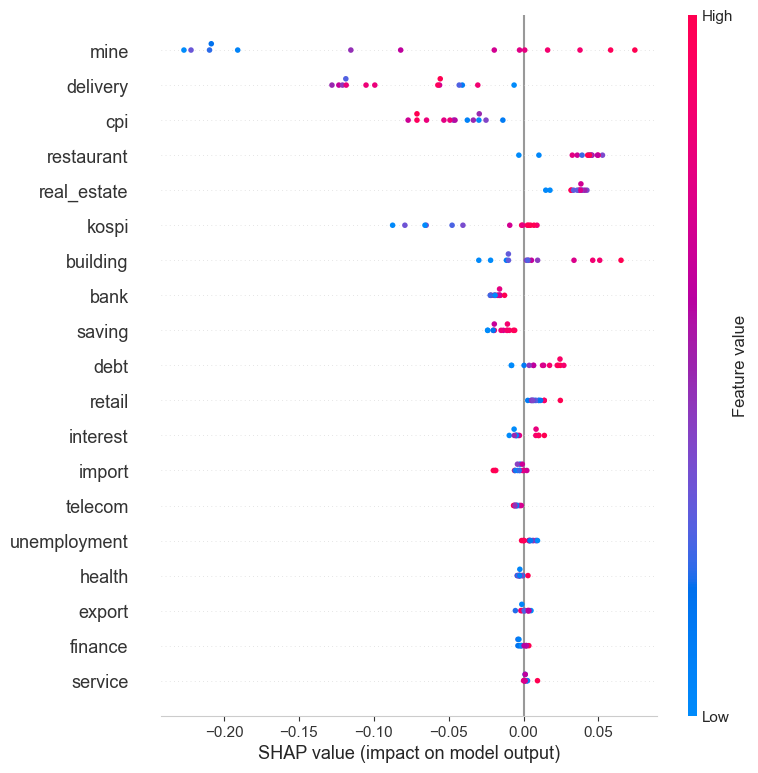

In [35]:
plt.grid(False)
shap.plots.beeswarm(shap_values_test, max_display = len(shap_values_train.feature_names))